The first step is to import the packages that will be needed for my analysis of population data

In [21]:
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns

In this code I will import data and view the first five rows of the data

In [17]:
new_pop_data = pd.read_csv(r"NST-EST2024-ALLDATA.csv")
new_pop_data.head()

,c,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,10,0,0,0,United States,331515736,331577720,332099760,334017321,336806231,...,6.840246,8.231786,0.000000,0.000000,0.000000,0.000000,1.133093,5.084797,6.840246,8.231786
1,20,1,0,0,Northeast Region,57617706,57431458,57252533,57159597,57398303,...,8.175150,9.848371,-4.674375,-7.824957,-4.857718,-3.334322,-3.271477,-2.006798,3.317432,6.514050
2,30,1,1,0,New England,15122011,15057350,15118145,15175633,15263573,...,8.005202,9.622685,2.416795,-2.957175,-2.067991,-1.575091,4.188365,4.325839,5.937211,8.047594
3,30,1,2,0,Middle Atlantic,42495695,42374108,42134388,41983964,42134730,...,8.236647,9.930153,-7.206423,-9.578005,-5.867209,-3.971810,-5.935167,-4.287388,2.369438,5.958342
4,20,2,0,0,Midwest Region,68998970,68984258,68872831,68903297,69186401,...,4.859117,5.861482,-2.502867,-2.649762,-1.300416,-0.709222,-1.700819,0.891824,3.558701,5.152260


This code shows the final five rows of the data set

In [18]:
new_pop_data.tail()

,c,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
61,40,4,9,53,Washington,7707586,7727209,7743760,7794123,7857320,...,8.570200,10.316588,-2.028057,-0.444333,-2.209764,0.337770,-0.219379,5.160549,6.360436,10.654358
62,40,3,5,54,West Virginia,1793736,1791646,1785618,1774122,1770495,...,1.309027,1.604870,1.668314,0.162371,1.859721,2.553330,2.074770,1.102328,3.168749,4.158200
63,40,2,3,55,Wisconsin,5894170,5897375,5881608,5903975,5930405,...,3.083727,3.724715,-3.158677,1.273081,1.298758,1.064973,-2.617204,4.614960,4.382486,4.789688
64,40,4,8,56,Wyoming,576844,577681,579636,581978,585067,...,1.777138,2.191552,3.126196,4.216547,2.983604,1.468425,3.362951,5.165227,4.760742,3.659977
65,40,X,X,72,Puerto Rico,3285874,3281590,3262711,3220137,3203792,...,-0.016812,4.745995,0.000000,0.000000,0.000000,0.000000,-1.319316,-8.681678,-0.016812,4.745995


array([[<Axes: title={'center': 'POPESTIMATE2023'}>]], dtype=object)

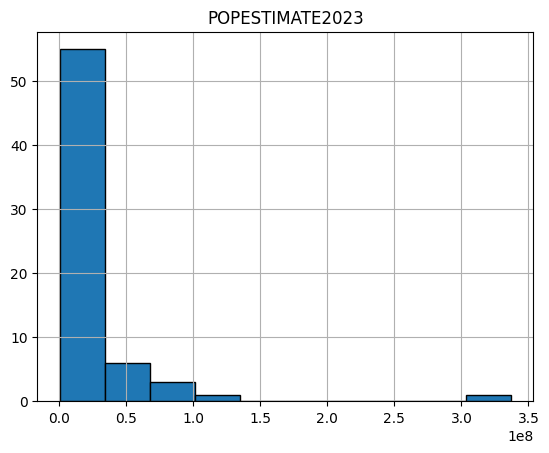

In [28]:
new_pop_data.hist("POPESTIMATE2023", bins = 10, edgecolor = "black")

array([[<Axes: title={'center': 'RINTERNATIONALMIG2024'}>]], dtype=object)

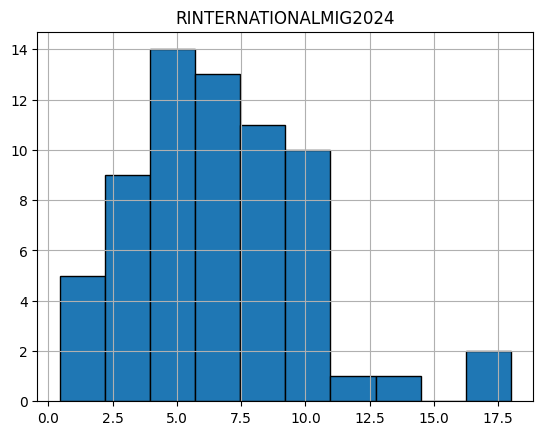

In [29]:
new_pop_data.hist("RINTERNATIONALMIG2024", bins=10, edgecolor = "black")